In [164]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axis as axis

from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf





sns.set(font_scale=1.25)
plt.style.use('seaborn-white')

<ipython-input-164-e3913e093b73>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


TESTING TO SEE IF I CAN PREDICT AN ABOVE OR BELOW MEAN PNL DAY 

In [165]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/dataframe1.csv'
df = pd.read_csv(file_path)
df.columns
df.drop("Date", axis = 1)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['Date', 'PNL', 'STD_A', 'STD_B', 'STD_C', 'STD_D', 'STD_E', 'STD_F',
       'STD_G', 'STD_Sum', 'STD_Total', 'STD_Diff', 'Open_Vol',
       'Perc_Change_Vol', 'Perc_Change_Price', 'Volume', 'Open_Int', 'Range',
       'High_Diff', 'High_Vol', 'High_PC_Price', 'High_PC_Vol'],
      dtype='object')

,PNL,STD_A,STD_B,STD_C,STD_D,STD_E,STD_F,STD_G,STD_Sum,STD_Total,...,Open_Vol,Perc_Change_Vol,Perc_Change_Price,Volume,Open_Int,Range,High_Diff,High_Vol,High_PC_Price,High_PC_Vol
0,-87826.0,86468.498575,10878.838940,12334.135120,2815.128735,34893.760498,1074.230010,124562.410578,273027.002457,208302.922302,...,37.12,0.87,1.46,443900.0,1886091.0,2.16,0,0,1.0,0.0
1,21268.0,91845.330007,94278.580341,9297.392074,3480.016427,34194.618568,21482.950192,121529.229587,376108.117196,230086.858942,...,38.27,5.64,2.70,704355.0,1881769.0,2.99,1,0,1.0,1.0
2,262982.0,94350.688837,21781.236370,8312.541272,642.888822,25922.699592,13779.058313,118436.921858,283226.035064,219589.530555,...,40.67,3.80,0.62,784946.0,1880445.0,1.25,0,0,0.0,1.0
3,-175431.0,114380.248146,16358.357476,19714.508052,2564.716941,34678.939436,9706.071673,118254.557267,315657.398990,228701.656093,...,36.96,7.12,3.59,1084446.0,1862150.0,3.88,0,0,1.0,1.0
4,44683.0,111122.888951,13866.942816,9517.710606,5498.290892,27595.620454,5983.076914,118929.949403,292514.480036,209646.713894,...,33.85,6.88,2.15,784520.0,1826195.0,2.57,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,-9212.0,159006.389726,16439.713255,5539.028234,6858.943954,17327.079776,3708.303937,246039.066881,454918.525762,336305.010981,...,36.86,0.38,0.36,979709.0,1918425.0,1.03,1,0,0.0,0.0
328,-155963.0,133102.043044,19114.299087,4241.599255,4516.749839,18645.720738,3701.869965,201477.474601,384799.756528,258774.805179,...,44.49,17.15,0.78,1170432.0,1913391.0,1.99,1,0,0.0,1.0
329,-130371.0,93783.326495,16130.048692,2284.753960,2403.311996,24296.427786,3608.884891,191750.646166,334257.399986,222386.049450,...,39.48,12.69,0.06,989697.0,1901975.0,1.22,1,0,0.0,1.0
330,35314.0,92013.490154,19061.987667,3007.815489,1289.283921,23963.530510,3569.635007,194111.365264,337017.108012,242245.463225,...,37.57,5.08,1.38,852063.0,1887131.0,1.37,0,0,0.0,1.0


,Date,PNL,STD_A,STD_B,STD_C,STD_D,STD_E,STD_F,STD_G,STD_Sum,...,Open_Vol,Perc_Change_Vol,Perc_Change_Price,Volume,Open_Int,Range,High_Diff,High_Vol,High_PC_Price,High_PC_Vol
0,2023-05-01,-87826.0,86468.498575,10878.838940,12334.135120,2815.128735,34893.760498,1074.230010,124562.410578,273027.002457,...,37.12,0.87,1.46,443900.0,1886091.0,2.16,0,0,1.0,0.0
1,2023-04-28,21268.0,91845.330007,94278.580341,9297.392074,3480.016427,34194.618568,21482.950192,121529.229587,376108.117196,...,38.27,5.64,2.70,704355.0,1881769.0,2.99,1,0,1.0,1.0
2,2023-04-27,262982.0,94350.688837,21781.236370,8312.541272,642.888822,25922.699592,13779.058313,118436.921858,283226.035064,...,40.67,3.80,0.62,784946.0,1880445.0,1.25,0,0,0.0,1.0
3,2023-04-26,-175431.0,114380.248146,16358.357476,19714.508052,2564.716941,34678.939436,9706.071673,118254.557267,315657.398990,...,36.96,7.12,3.59,1084446.0,1862150.0,3.88,0,0,1.0,1.0
4,2023-04-25,44683.0,111122.888951,13866.942816,9517.710606,5498.290892,27595.620454,5983.076914,118929.949403,292514.480036,...,33.85,6.88,2.15,784520.0,1826195.0,2.57,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022-01-07,-9212.0,159006.389726,16439.713255,5539.028234,6858.943954,17327.079776,3708.303937,246039.066881,454918.525762,...,36.86,0.38,0.36,979709.0,1918425.0,1.03,1,0,0.0,0.0
328,2022-01-06,-155963.0,133102.043044,19114.299087,4241.599255,4516.749839,18645.720738,3701.869965,201477.474601,384799.756528,...,44.49,17.15,0.78,1170432.0,1913391.0,1.99,1,0,0.0,1.0
329,2022-01-05,-130371.0,93783.326495,16130.048692,2284.753960,2403.311996,24296.427786,3608.884891,191750.646166,334257.399986,...,39.48,12.69,0.06,989697.0,1901975.0,1.22,1,0,0.0,1.0
330,2022-01-04,35314.0,92013.490154,19061.987667,3007.815489,1289.283921,23963.530510,3569.635007,194111.365264,337017.108012,...,37.57,5.08,1.38,852063.0,1887131.0,1.37,0,0,0.0,1.0


In [166]:
mean_PNL = df.PNL.mean(axis = 0)
mean_PNL
df["High_PNL"] = np.where(df['PNL'] > mean_PNL, 1,0)
df




-2810.1987951807228

,Date,PNL,STD_A,STD_B,STD_C,STD_D,STD_E,STD_F,STD_G,STD_Sum,...,Perc_Change_Vol,Perc_Change_Price,Volume,Open_Int,Range,High_Diff,High_Vol,High_PC_Price,High_PC_Vol,High_PNL
0,2023-05-01,-87826.0,86468.498575,10878.838940,12334.135120,2815.128735,34893.760498,1074.230010,124562.410578,273027.002457,...,0.87,1.46,443900.0,1886091.0,2.16,0,0,1.0,0.0,0
1,2023-04-28,21268.0,91845.330007,94278.580341,9297.392074,3480.016427,34194.618568,21482.950192,121529.229587,376108.117196,...,5.64,2.70,704355.0,1881769.0,2.99,1,0,1.0,1.0,1
2,2023-04-27,262982.0,94350.688837,21781.236370,8312.541272,642.888822,25922.699592,13779.058313,118436.921858,283226.035064,...,3.80,0.62,784946.0,1880445.0,1.25,0,0,0.0,1.0,1
3,2023-04-26,-175431.0,114380.248146,16358.357476,19714.508052,2564.716941,34678.939436,9706.071673,118254.557267,315657.398990,...,7.12,3.59,1084446.0,1862150.0,3.88,0,0,1.0,1.0,0
4,2023-04-25,44683.0,111122.888951,13866.942816,9517.710606,5498.290892,27595.620454,5983.076914,118929.949403,292514.480036,...,6.88,2.15,784520.0,1826195.0,2.57,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022-01-07,-9212.0,159006.389726,16439.713255,5539.028234,6858.943954,17327.079776,3708.303937,246039.066881,454918.525762,...,0.38,0.36,979709.0,1918425.0,1.03,1,0,0.0,0.0,0
328,2022-01-06,-155963.0,133102.043044,19114.299087,4241.599255,4516.749839,18645.720738,3701.869965,201477.474601,384799.756528,...,17.15,0.78,1170432.0,1913391.0,1.99,1,0,0.0,1.0,0
329,2022-01-05,-130371.0,93783.326495,16130.048692,2284.753960,2403.311996,24296.427786,3608.884891,191750.646166,334257.399986,...,12.69,0.06,989697.0,1901975.0,1.22,1,0,0.0,1.0,0
330,2022-01-04,35314.0,92013.490154,19061.987667,3007.815489,1289.283921,23963.530510,3569.635007,194111.365264,337017.108012,...,5.08,1.38,852063.0,1887131.0,1.37,0,0,0.0,1.0,1


In [167]:
train_df = df[:258].copy() # First 258 rows as the training set (all of 2022)
test_df = df[258:].copy()  # Remaining rows as the test set (2023 until May 1st)

In [168]:
c = len(df.axes[1])


df2 = train_df.copy()


column_names = df2.columns.values.tolist()

for col in column_names[1:]:
  corr_list= []
  corr = train_df[col].corr(train_df['High_PNL'])
  corr = np.absolute(corr)
  if corr < 0.2:
    train_df = train_df.drop(col,axis=1)

print(train_df.shape)
train_df

(258, 9)


,Date,PNL,STD_E,STD_F,STD_G,Open_Vol,Volume,High_Vol,High_PNL
0,2023-05-01,-87826.0,34893.760498,1074.230010,124562.410578,37.12,443900.0,0,0
1,2023-04-28,21268.0,34194.618568,21482.950192,121529.229587,38.27,704355.0,0,1
2,2023-04-27,262982.0,25922.699592,13779.058313,118436.921858,40.67,784946.0,0,1
3,2023-04-26,-175431.0,34678.939436,9706.071673,118254.557267,36.96,1084446.0,0,0
4,2023-04-25,44683.0,27595.620454,5983.076914,118929.949403,33.85,784520.0,0,1
...,...,...,...,...,...,...,...,...,...
253,2022-04-26,-167594.0,13663.182845,17900.130835,110034.694004,52.86,685031.0,1,0
254,2022-04-25,170622.0,15900.755996,13461.507748,113509.334397,56.00,647830.0,1,1
255,2022-04-22,-79995.0,16575.373709,1576.639481,112510.731802,49.86,440249.0,1,0
256,2022-04-21,-138847.0,11167.993145,11568.394751,96018.980693,52.23,551943.0,1,0


In [169]:
df3  = train_df
df3  = df3.drop(["High_PNL","Date"], axis=1) 

column_names2 = df3.columns.values.tolist()
num_of_col = len(column_names2)
drop_list = []
for i in range(num_of_col):
  first = column_names2[i]
  j= i +1 

  for j in range(j,num_of_col):
  
    second =  column_names2[j]
    corr = df3[first].corr(df3[second])
    if corr > 0.75:
      drop_list.append(second)

drop_list = set(drop_list)
drop_list = list(drop_list)

for i in drop_list:

  train_df = train_df.drop(i,axis=1).copy()

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      258 non-null    object 
 1   PNL       258 non-null    float64
 2   STD_E     258 non-null    float64
 3   STD_F     258 non-null    float64
 4   STD_G     258 non-null    float64
 5   Open_Vol  258 non-null    float64
 6   Volume    258 non-null    float64
 7   High_PNL  258 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 16.2+ KB


In [170]:
est = smf.logit('High_PNL ~  STD_E +	STD_F +	STD_G +	Open_Vol + Volume', train_df).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.597869
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               High_PNL   No. Observations:                  258
Model:                          Logit   Df Residuals:                      252
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 May 2023   Pseudo R-squ.:                  0.1369
Time:                        03:51:39   Log-Likelihood:                -154.25
converged:                       True   LL-Null:                       -178.71
Covariance Type:            nonrobust   LLR p-value:                 2.310e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1386      1.754     -0.649      0.516      -4.576       2.298
STD_E       1.568e-05   2.43e-05      0.645      0.519    -3.2e-05    6.33e-05
STD_F       3.547e-05   1.78e-05      1.990      0.047    5.27e-07    7.04e-05
STD_G       4.954e-06   1.88e-06      2.637      0.008    1.27e-06    8.64e-06
Open_Vol      -0.0483      0.028     -1.723      0.085      -0.103       0.007
Volume      2.413e-06    8.4e-07      2.874      0.004    7.67e-07    4.06e-06
==============================================================================
"""

ONLY STD_F, STD_G AND Volume have p values that are significant, so I will remove the other predictors 

In [171]:
est2 = smf.logit('High_PNL ~  STD_F +	STD_G  + Volume', train_df).fit()
est2.summary()

Optimization terminated successfully.
         Current function value: 0.610066
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               High_PNL   No. Observations:                  258
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 May 2023   Pseudo R-squ.:                  0.1192
Time:                        03:51:39   Log-Likelihood:                -157.40
converged:                       True   LL-Null:                       -178.71
Covariance Type:            nonrobust   LLR p-value:                 2.961e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4686      0.708     -4.897      0.000      -4.857      -2.080
STD_F       4.294e-05   1.71e-05      2.516      0.012    9.49e-06    7.64e-05
STD_G       7.174e-06    1.7e-06      4.208      0.000    3.83e-06    1.05e-05
Volume      2.352e-06   8.22e-07      2.860      0.004     7.4e-07    3.96e-06
==============================================================================
"""

In [174]:
test_df['per'] = est2.predict(test_df[['STD_F','STD_G', 'Volume']])
test_df['Prediction'] = np.where(test_df['per'] >= 0.5, 1, 0)
test_df[['High_PNL', 'Prediction']]

,High_PNL,Prediction
258,0,0
259,0,0
260,0,0
261,1,0
262,1,0
...,...,...
327,0,1
328,0,1
329,0,1
330,1,1


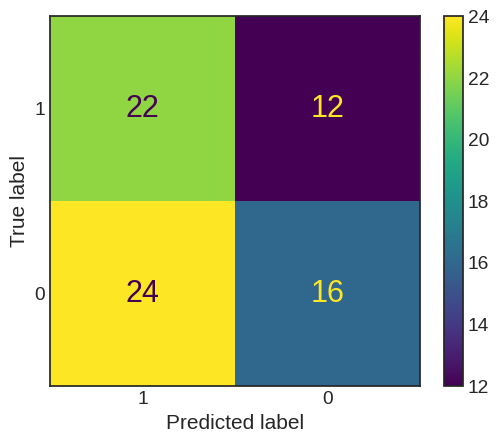

In [176]:
cm = confusion_matrix(test_df['High_PNL'], test_df['Prediction'], labels=[1, 0])
cmd = ConfusionMatrixDisplay(cm, display_labels=[1, 0])
plt.rc('font', size = 22)
cmd.plot()

In [178]:
# Evaluate using the accuracy
print(f"Correct Prediction Rate = {(test_df['High_PNL'] == test_df['Prediction']).mean():.4f}")

Correct Prediction Rate = 0.5135


We can say our correct rate on our test data is 51.35%; therefore our test error of our model is 48.65%

In [179]:
precision_score(test_df['High_PNL'], test_df['Prediction'], pos_label = 1)
print('\n')
recall_score(test_df['High_PNL'], test_df['Prediction'], pos_label = 1)

0.4782608695652174

0.6470588235294118

The Precision of predicting PNL above the mean is TP/(TP+FP) = 22/(22+24) = 47% and the recall score is TP/(TP+FN) = 64.7%